## 2. Data Exploration and Preprocessing
#### **Task 1:** Data Exploration

Notebook: notebooks/EDA.ipynb
Steps:
- Load the dataset.
- Explore the data structure, types, and summary statistics.
- Visualize relationships between features and the target variable.
- Identify missing values and outliers.

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###Load the datasets

In [4]:
# Load dataset
file_path =('../Data/BostonHousing.csv')
df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


###Explore the data structure, types, and summary statistics

In [7]:
# Check the structure of the dataset
df.info()


# Get summary statistics
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


rm    5
dtype: int64

 ###Visualize relationships between features and the target variable

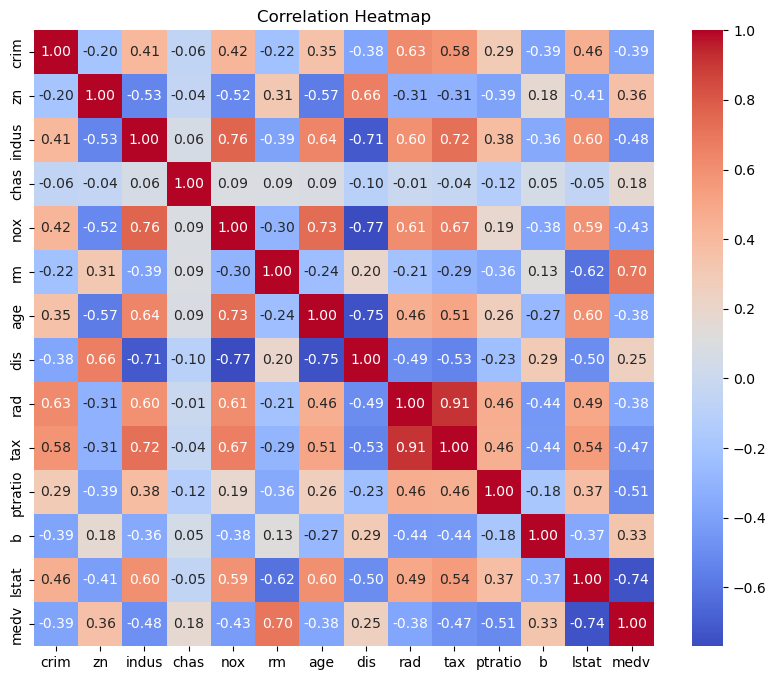

medv       1.000000
rm         0.696169
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [10]:
# Correlation heatmap
corr_matrix =df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Top features correlated with MEDV
print(corr_matrix['medv'].sort_values(ascending=False))

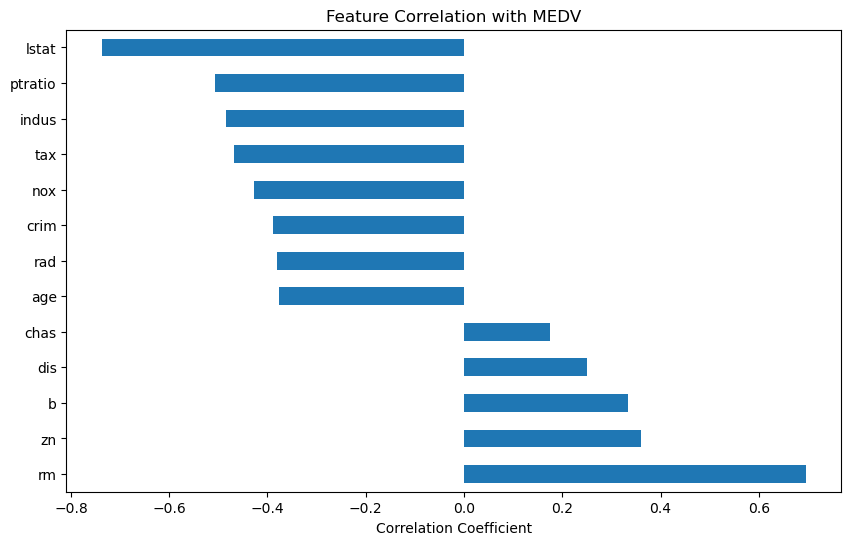

In [11]:

# Calculate correlations with MEDV
corr_with_target = df.corr()['medv'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_with_target.drop('medv').plot.barh()  # Horizontal bar chart
plt.title("Feature Correlation with MEDV")
plt.xlabel("Correlation Coefficient")
plt.show()

['rm', 'tax', 'indus', 'ptratio', 'lstat']


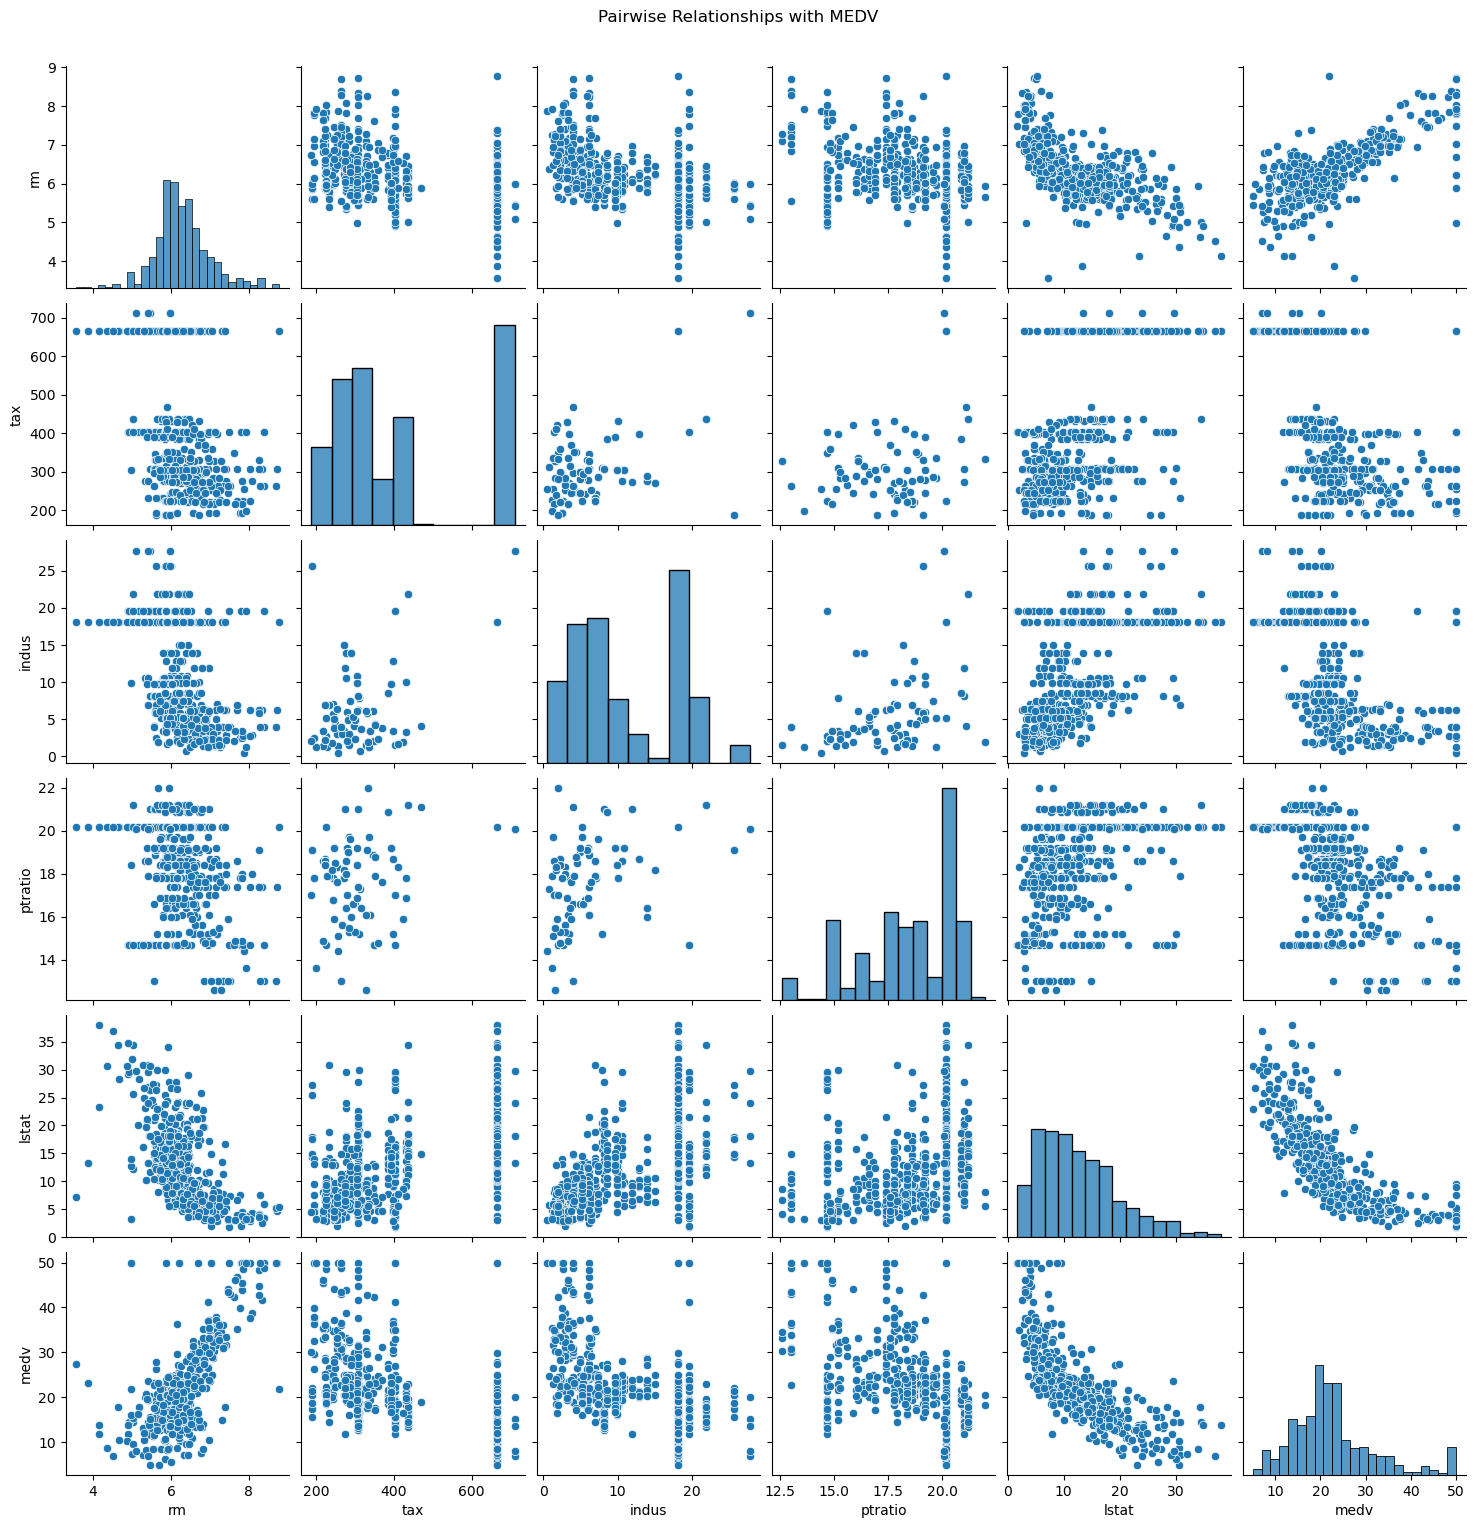

In [13]:
# Top correlated features
top_features = corr_with_target.drop('medv').head(1).index.tolist() + \
               corr_with_target.drop('medv').tail(4).index.tolist()
print(top_features)

# Pairplot for selected features + MEDV
sns.pairplot(df[top_features + ['medv']])
plt.suptitle("Pairwise Relationships with MEDV", y=1.02)
plt.show()

###Identify missing values and outliers.

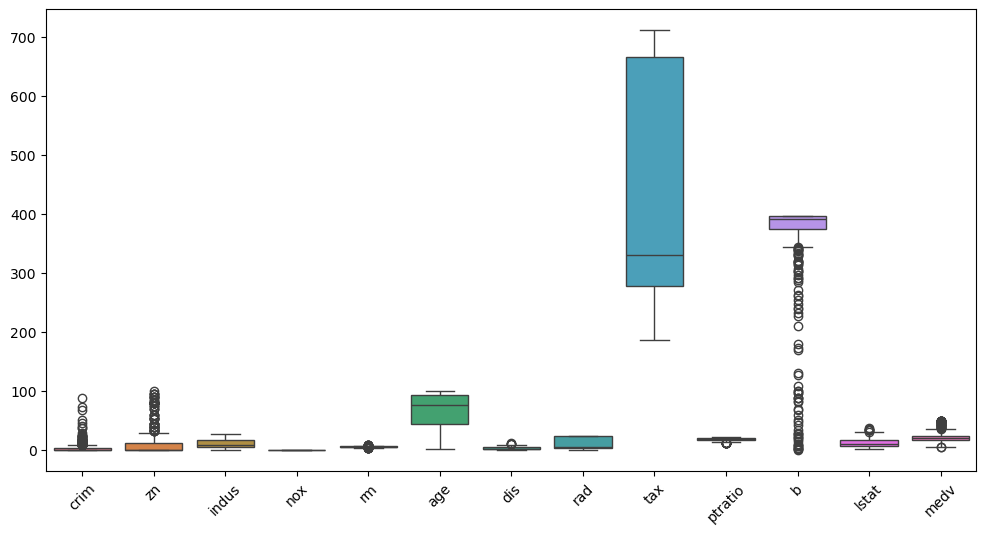

In [15]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['chas']))
plt.xticks(rotation=45)
plt.show()

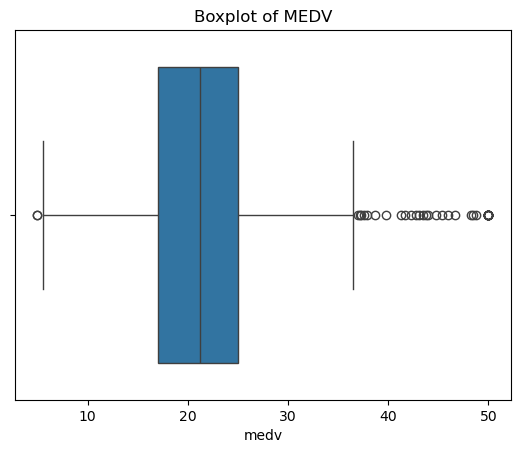

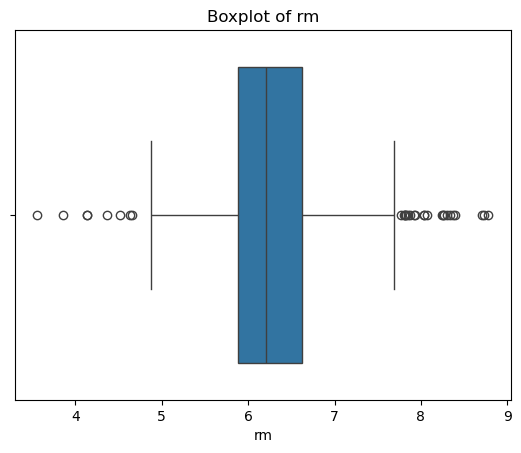

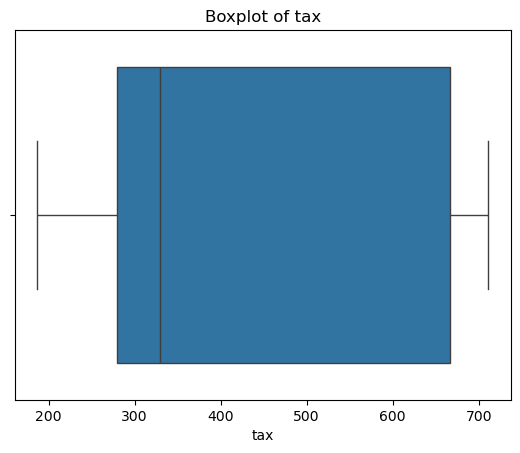

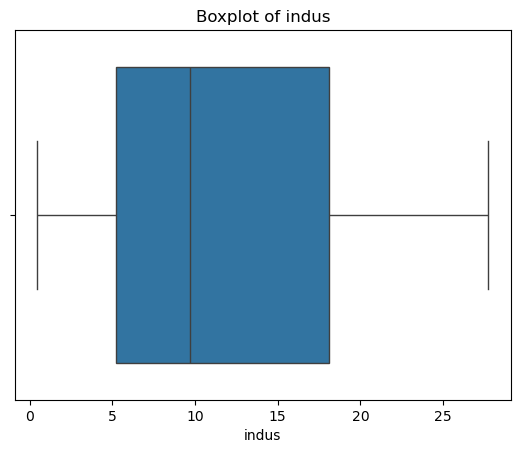

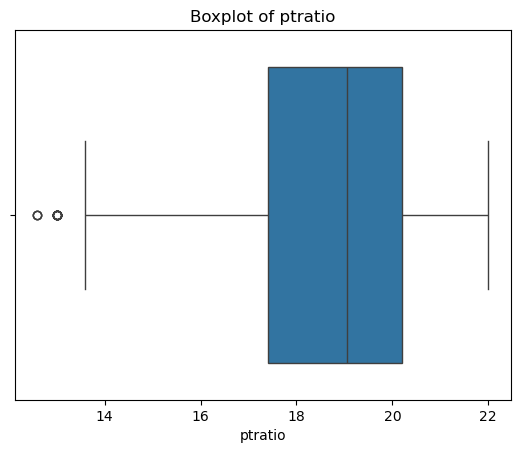

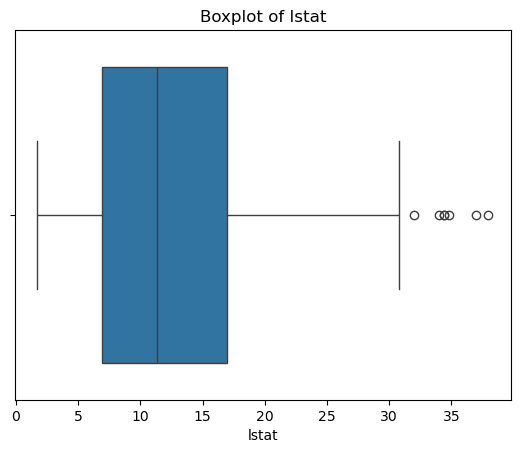

In [16]:
# Boxplot for MEDV
sns.boxplot(x=df['medv'])
plt.title("Boxplot of MEDV")
plt.show()

# box plot of top features
for i in range(len(top_features)):
    sns.boxplot(x=df[top_features[i]])
    plt.title(f"Boxplot of {top_features[i]}")
    plt.show()

Missing Values:
     Missing Values  % Missing
rm               5       0.99


<function matplotlib.pyplot.show(close=None, block=None)>

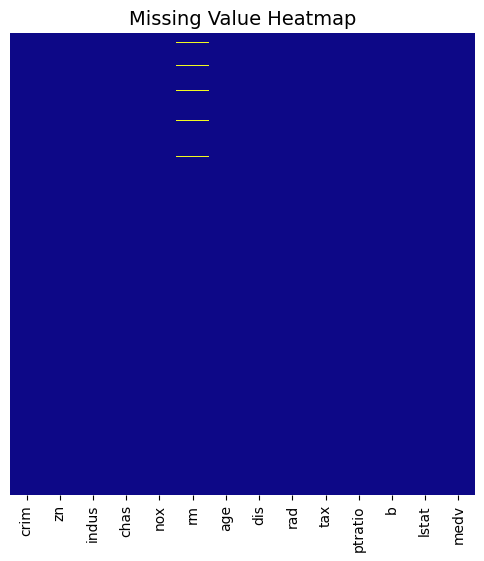

In [19]:
# Total missing values per column
missing_values = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    '% Missing': round(df.isnull().mean()*100,2)
}).sort_values('% Missing', ascending=False)

print("Missing Values:\n", missing_values[missing_values['Missing Values']>0])

# Visualize missing data
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma', yticklabels=False)
plt.title("Missing Value Heatmap", fontsize=14)
plt.show